<a href="https://colab.research.google.com/github/camgenomicmedicine/GMO7-Jupyter/blob/main/Power_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


This tutorial shows how to perform power and sample size calculations in R for the case where the outcome variable is either continuous or binary.


## Binary outcome

Binary outcome means that every subject has either (1= event) or (0=
no event). The event probability is the probability that a subject has
the event. The aim is to show that two groups differ with respect to
the event probability.

## Power for given sample size

Aim: to compute the power of a study to show a difference between
group 1 (n=28) in which the event probability is 30% and group 2
(n=28) in which the event probability is 55%.

In [ ]:
power.prop.test(n=28,p1=0.3,p2=0.55)


     Two-sample comparison of proportions power calculation 

              n = 28
             p1 = 0.3
             p2 = 0.55
      sig.level = 0.05
          power = 0.4720963
    alternative = two.sided

NOTE: n is number in *each* group


### Possible conclusion sentence:

*The power of a study which includes 28 subjects in each of two experimental groups to see a difference between the event probabilities is 48% under the assumption that the event probabilities are 30% in group 1 and 55% in group 2.*

## Sample size for given power

Aim: To compute the sample size of a study to show a difference
between group 1 (n=28) in which the event probability is 30% and group
2 (n=28) in which the event probability is 55% with a power of 80%.

In [ ]:
power.prop.test(power=0.8,p1=0.3,p2=0.55)


     Two-sample comparison of proportions power calculation 

              n = 60.18568
             p1 = 0.3
             p2 = 0.55
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


### Possible conclusion sentence:

*In order to achieve a power of 80% under the assumed event probabilities the study should include at least 61 subjects in each of the experimental groups.*

# Continuous outcome

A continuous outcome variable is a variable that can take on any value
between its minimum and its maximum value, such as weight or BMI or
the blood hemoglobin concentration. For the power and sample size
calculations illustrated here the distribution of the outcome variable
is characterized by its mean and standard deviation.

## Power for given sample size

Aim: to compute the power of a study which aims to show a difference
in means between group 1 (n=6) and group 2 (n=6) assuming that the
magnitude of the difference is 0.3 units and the standard deviation is
0.28 units.

In [ ]:
power.t.test(n=6,delta=0.3,sd=0.28,type="two.sample")


     Two-sample t test power calculation 

              n = 6
          delta = 0.3
             sd = 0.28
      sig.level = 0.05
          power = 0.3890758
    alternative = two.sided

NOTE: n is number in *each* group


### Possible conclusion sentence: 

*The power of the study is 39% to detect a difference in means of 0.3 units.*

## Sample size for a given power

Aim: to compute the sample size needed to achieve a power of 90% in a
study which aims to show a difference in means between two independent
groups assuming that the magnitude of the difference is 0.3 units and
the standard deviation is 0.28 units.

In [ ]:
power.t.test(power=0.9,delta=0.3,sd=0.28,type="two.sample")


     Two-sample t test power calculation 

              n = 19.3192
          delta = 0.3
             sd = 0.28
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number in *each* group


Possible conclusion sentence: 

*To reach a power of 90% the study should include at least 20 subjects in each group to detect a difference in means of 0.3 units.*

# Plotting power against sample size

The functions `power.prop.test` and `power.t.test` can compute the
power for a sequence of sample sizes simultaneously.

The following code shows how to make a graph which shows the increase
of the power for a given sequence of sample sizes

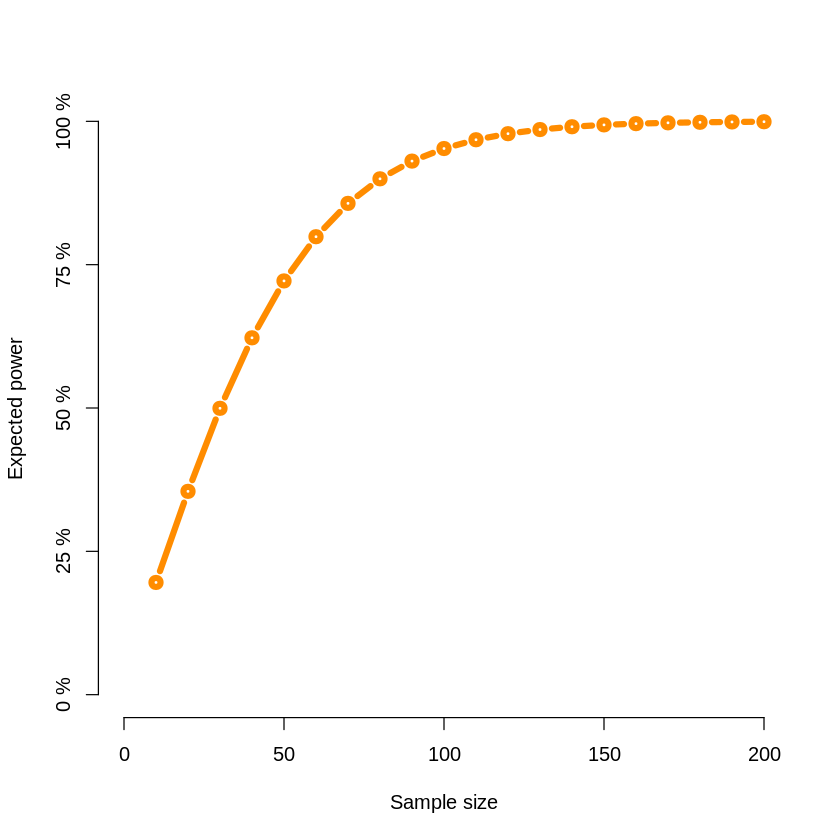

In [ ]:
samplesizes <- seq(from=10,to=200,by=10)
power.samplesizes <- power.prop.test(n=samplesizes,p1=0.3,p2=0.55)$power
plot(samplesizes,
     power.samplesizes,
     xlim=c(0,200),
     xlab="Sample size",
     ylab="Expected power",
     ylim=c(0,1),
     type="b",
     col="darkorange",
     lwd=5,axes=FALSE)
axis(1,at=c(0,50,100,150,200))
axis(2,at=c(0,0.25,0.5,0.75,1),labels=paste(c(0,25,50,75,100),"%"))

Often the greatest concern is the magnitude of the expected difference
between the groups, even if based on historical data or a pilot
study. Therefore a useful plot shows how the sample size for fixed
power (or power for fixed sample size) varies as a function of the
difference. However, the functions `power.prop.test` and
`power.t.test` can unfortunately not deal with a sequence of
differences. Therefore we use a loop (`sapply`) in the following
example. To show the effect of the hypothesized standard deviation we
also show the required sample size when the standard deviation is
only 0.2 instead of 0.4.

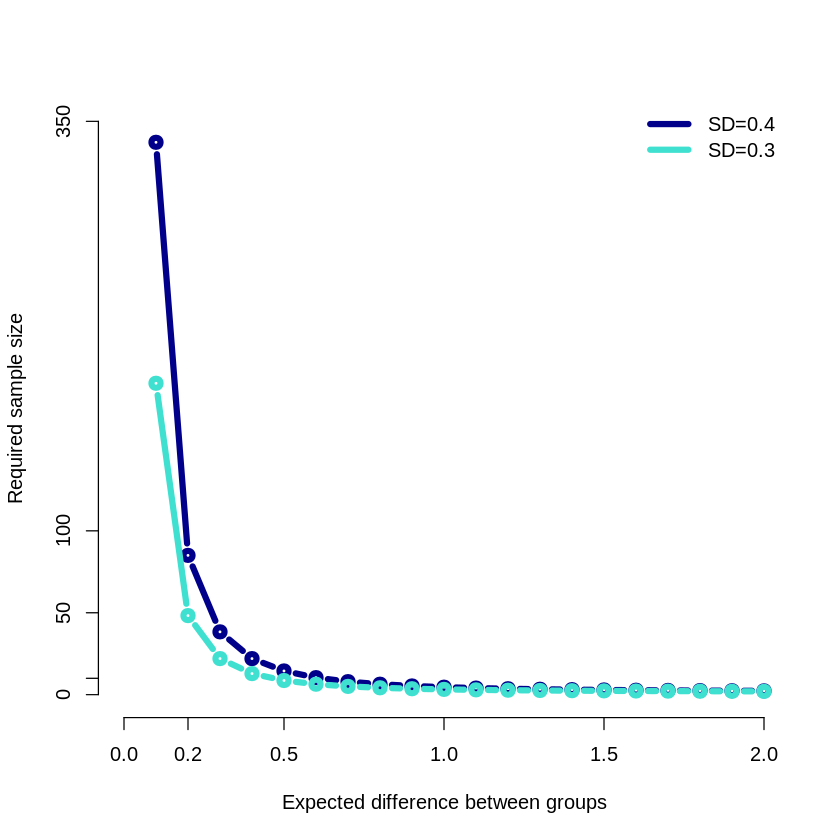

In [ ]:
differences <- seq(from=0.1,to=2,by=0.1)
samplesize.sd04 <- sapply(differences,
                          function(d){power.t.test(power=0.9,
                                                   delta=d,
                                                   sd=0.4,
                                                   type="two.sample")$n})
samplesize.sd03 <- sapply(differences,
                          function(d){power.t.test(power=0.9,
                                                   delta=d,
                                                   sd=0.3,
                                                   type="two.sample")$n})
plot(differences,
     samplesize.sd04,
     xlim=c(0,2),
     xlab="Expected difference between groups",
     ylab="Required sample size",
     ylim=c(0,350),
     type="b",
     col="darkblue",
     lwd=5,axes=FALSE)
lines(differences, samplesize.sd03,col="turquoise",lwd=5,type="b")
axis(1,at=c(0,0.2,0.5,1,1.5,2))
axis(2,at=c(350,100,50,10,0))
legend(x="topright",lwd=5,bty="n",legend=c("SD=0.4","SD=0.3"),col=c("darkblue","turquoise"))

Now you have seen how to calculate sample size for a prospective study, try to employ these calculations in your own proposals.